# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

# Ecuación de Poisson
-----------------
La ecuación de Poisson se obtiene añadiendo termino (una fuente) al lado izquierdo de la ecuación de Laplace

\begin{equation}
\nabla^{2} \phi = \rho,
\end{equation}

La ecuación de Poisson aparece  mucho en problemas de física, especialmente en electromagnetismo, donde $\rho$ representa la densidad de carga eléctrica.

En el caso de dos dimensiones la ecuación de Laplace toma la forma de

\begin{equation}
\frac{\partial^{2} \phi}{\partial x^{2}} + \frac{\partial^{2} \phi}{\partial y^{2}} = \rho,
\end{equation}

se utiliza el mismo criterio de discretización utilizado para la ecuación de Laplace

\begin{equation}
\frac{\phi_{i+1, j}^n - 2\phi_{i,j}^n + \phi_{i-1,j}^n}{\Delta x^2} + \frac{\phi_{i,j+1}^n - 2\phi_{i,j}^n + \phi_{i, j-1}^n}{\Delta y^2} = \rho^{n}_{i,j},
\end{equation}

despejando para $\phi_{i,j}^n$

\begin{equation}
\phi_{i,j}^n = \frac{\Delta y^2(\phi_{i+1,j}^n+\phi_{i-1,j}^n)+\Delta x^2(\phi_{i,j+1}^n + \phi_{i,j-1}^n) - \rho^{n}_{i,j} \Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}.
\end{equation}

Como ejemplo, resolvemos la ecuacion de Poisson para las condiciones iniciales

$\phi = 0$ en $x = 0, 2$ y $y = 0, 1$

y para la fuente

$\rho_{i,j}=100$ en $i=\frac{1}{4}nx, j=\frac{1}{4}ny$,

$\rho_{i,j}=-100$ en $i=\frac{3}{4}nx, j=\frac{3}{4}ny$,

$\rho_{i,j}=0$ en el resto de los puntos.

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Podemos utilizar la misma funcion para graficar en tres dimensiones que se usó para el codigo de la ecuación de Laplace.

In [0]:
def plot3D(x, y, phi):
  fig = plt.figure(figsize=(11,7), dpi=100)
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(x,y)
  surf = ax.plot_surface(X, Y, phi.transpose(), rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
  ax.set_xlim(0, max(x))
  ax.set_ylim(0, max(y))
  ax.view_init(30,225)
  ax.set_xlabel("$x$")
  ax.set_ylabel("$y$")

In [0]:
#declaracion de variables
nx = 50
ny = 50
nt = 100
Lx = 2.0
Ly = 1.0

#condiciones iniciales
phi = np.zeros((ny,nx)) #matriz de ceros
#phin = np.zeros((nx,ny))
rho = np.zeros((nx, ny))
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

phi[:,0]=0.0
phi[:,-1]=0.0
phi[0,:]=0.0
phi[-1,:]=0.0

# para la fuente
rho[int(ny / 4), int(nx / 4)]  = 100
rho[int(3 * ny / 4), int(3 * nx / 4)] = -100

Las iteraciones se realizan hasta llegar a una precision deseada.

In [0]:
def poisson_2D(phi, x, y, precision):
  norma = 1
  phin = np.empty_like(phi)

  dx = (max(x) - min(x))/(len(x) - 1)
  dy = (max(y) - min(y))/(len(y) - 1)

  pasos = 0

  while norma > precision: #las iteraciones se detienen hasta llegar a la precision deseada
    phin = phi.copy()
    for i in range(1, len(x)-1):
      for j in range(1, len(y)-1):
        phi[i, j] = (dy*dy*(phin[i+1, j] + phin[i-1, j]) + dx*dx*(phin[i, j+1] + phin[i, j-1]) + rho[i,j]*dx*dx*dy*dy)/(2.0*(dx*dx + dy*dy))

    phi[:,1] = 0.0
    phi[:,-1] = 0.0
    phi[0,:] = 0.0
    phi[-1,:] = 0.0 

    if (np.sum(np.abs(phin[:])) == 0.0):
      pasos += 1
      continue

    norma = np.sum(np.abs(phi[:]) - np.abs(phin[:]))/np.sum(np.abs(phin[:]))

    pasos += 1

    #condicion de paro, por si nunca llega a la precision deseada
    if(pasos > 1000000):
      break

  return phi

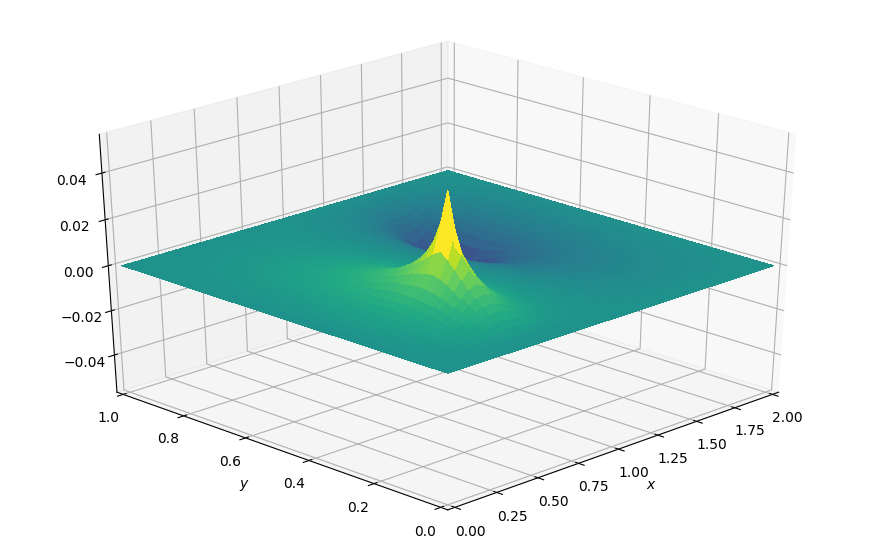

In [0]:
phi = poisson_2D(phi, x, y, 1e-4)
plot3D(x, y, phi)